In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

## Question 1 

/Users/liuchang/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


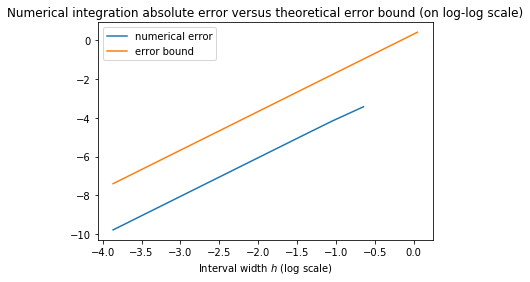

In [105]:
# question 1a 
f = lambda x: 1./(5/4. - np.cos(x))
# divide into n = 50 equal-size intervals
n = 50

def numerical_error(n,truth):
    
    intervals = np.linspace(low,up, num = n+1) # n intervals with n+1 evaluation points
#     print 'interval',intervals
    h = (up-low)*1./n
#     print 'width',h
    # compute the n trapezoid by evaluating f on the end points of them
    Q = lambda h,f,intervals: h* ( f(intervals)[1:n].sum() + .5* f(intervals[0]) + .5*f(intervals[-1])  )
#     print 'two values:',Q(h,f,intervals),truth
    return np.abs(Q(h,f,intervals) - truth)

def E_bound(h):
    intervals = np.linspace(low,up, 1000)
    double_f = lambda x: -np.cos(x) * (5/4.- np.cos(x))**(-2) + np.sin(x)**2 * 2 * (5/4. - np.cos(x))**(-3)

    return h**2 * np.pi /36. * np.linalg.norm(double_f(intervals),ord=np.inf)

# define parameters
ns = np.arange(1,51) 
up,low = np.pi/3.,0
hs = (up-low)/ns
truth = 8.*np.pi/9.

# # evaluate the integral
numerical = [numerical_error(n,truth) for n in ns]
bound = E_bound(hs) 

# plot the results
plt.plot(np.log(hs),np.log(numerical),label='numerical error')
plt.plot(np.log(hs),np.log(bound),label='error bound')

plt.legend()
plt.title('Numerical integration absolute error versus theoretical error bound (on log-log scale)')
plt.xlabel('Interval width $h$ (log scale)')
plt.show()


### answer 1a 
Clearly the numerical error is below the error bound.

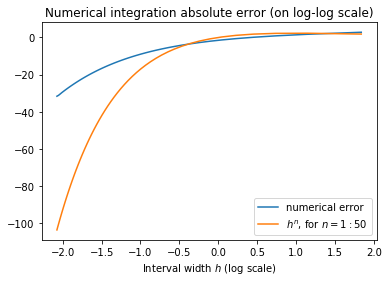

/Users/liuchang/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/Users/liuchang/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


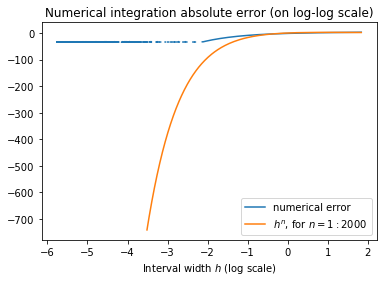

In [120]:
# question 1b 
# define parameters
ns = np.arange(1,51) 
up,low = np.pi*2,0.
hs = (up-low)/ns
truth = 8.*np.pi/3.

# evaluate the integral
numerical = [numerical_error(n,truth) for n in ns]


# plot the results
plt.plot(np.log(hs),np.log(numerical),label='numerical error')
plt.plot(np.log(hs),[np.log(hs[i]**n) for i,n in enumerate(ns)],label='$h^n$, for $n =1:50$')
plt.legend()
plt.title('Numerical integration absolute error (on log-log scale)')
plt.xlabel('Interval width $h$ (log scale)')
plt.show()


# for a large range of ns
ns = np.arange(1,2001) 
hs = (up-low)/ns
numerical = [numerical_error(n,truth) for n in ns]

plt.plot(np.log(hs),np.log(numerical),label='numerical error')
plt.plot(np.log(hs),[np.log(hs[i]**n) for i,n in enumerate(ns)],label='$h^n$, for $ n =1:2000$')
plt.legend()
plt.title('Numerical integration absolute error (on log-log scale)')
plt.xlabel('Interval width $h$ (log scale)')
plt.show()


The error seems to converge to $h^n$ where $n$ is the number of intervals used to evaluate the integral.

### answer 1a 
We have the exponential scaling factor $m$ close to 0 for $ h^m$ . 

## Question 2 


In [128]:
# 2a see written part

In [25]:
# 2 b 


quad_points = np.array([-np.sqrt(3/5.),0.,np.sqrt(3/5.)])
quad_weights = np.array([5/9.,8/9.,5/9.])

def gaussian_quad(low,high):
    # rescaled quad
    x = (high-low)/2.* quad_points + (high+low)/2.
    return (high-low)/2. * quad_weights.dot( func(x,m) )

def adaptive_integration(low,high,m= None, current_I=None):
    global global_counter, global_err
    # subdivide into two integrals (low, mid) and (mid, high)
    mid = (high+low)/2.
    
    # evaluate each integral with Gaussain Quadrature method that scales arbitrary bounds to [-1,1]
   
   
    if current_I is None:
        current_I = gaussian_quad(low,high)
    
    first_half = gaussian_quad(low,mid)
    second_half = gaussian_quad(mid,high)
#     print current_I,first_half,second_half
#     print abs(first_half + second_half - current_I)

    err = abs(first_half + second_half - current_I)
    
    global_err += err
    global_counter += 1
#     print err,'step',global_counter,first_half + second_half ,gaussian_quad(low,high)
    #   if the integral is not precise enough, continue
    if  err > T * (high-low):
        return adaptive_integration(low,mid,first_half) + adaptive_integration(mid,high,second_half)
    else: # if precise enough, return the current sum
        return current_I
    
def true_integral(low, high, m):
    m_degree_term = lambda x: x**(m+1)*1./(m+1.)
    quad_term = lambda x: x**3/3.
    
    return m_degree_term(high) - m_degree_term(low) + quad_term(low) - quad_term(high) + high - low


# the function integrate
def func( x,m):
    return x**m - x**2 + 1

T = 1e-6
low,high = -1.,5/4.
out = pd.DataFrame(columns = 'True integral value,Numerical integral value, \
                   Number of intervals, Sum of abs(error)'.split(','))
for i,m in enumerate(range(1,9)):
    global global_counter , global_err
    global_counter , global_err = 0, 0.
    out.loc['m = '+str(m),:] =true_integral(low,high,m),adaptive_integration(low,high,m=m),global_counter,global_err
out

,True integral value,Numerical integral value,Number of intervals,Sum of abs(error)
m = 1,1.54688,1.54688,1,0
m = 2,2.25,2.25,1,0
m = 3,1.62598,1.62598,1,0
m = 4,2.07598,2.07598,1,0
m = 5,1.73474,1.73474,1,0
m = 6,2.08968,2.08968,15,0.10426
m = 7,1.88568,1.88568,21,0.0962169
m = 8,2.20458,2.20458,25,0.271403


### answer 1b
Again, we see than all polynomials less than degree 3 will no error. It seems that higher degree polynomials (than the expected degree of 3) will have increasing sum of all absolute errors (summed whenever we evaluate them).

In [26]:

def gaussian_quad(low,high):
    # rescaled quad
    x = (high-low)/2.* quad_points + (high+low)/2.
    return (high-low)/2. * quad_weights.dot( func(x) )

def adaptive_integration(low,high,m= None, current_I=None):
    global global_counter, global_err
    # subdivide into two integrals (low, mid) and (mid, high)
    mid = (high+low)/2.
    
    # evaluate each integral with Gaussain Quadrature method that scales arbitrary bounds to [-1,1]
   
   
    if current_I is None:
        current_I = gaussian_quad(low,high)
    
    first_half = gaussian_quad(low,mid)
    second_half = gaussian_quad(mid,high)
#     print current_I,first_half,second_half
#     print abs(first_half + second_half - current_I)

    err = abs(first_half + second_half - current_I)
    
    global_err += err
    global_counter += 1
#     print err,'step',global_counter,first_half + second_half ,gaussian_quad(low,high)
    #   if the integral is not precise enough, continue
    if  err > T * (high-low):
        return adaptive_integration(low,mid,first_half) + adaptive_integration(mid,high,second_half)
    else: # if precise enough, return the current sum
        return current_I


def adapt_quad(low,high,T = 1e-6):
    
    out = pd.DataFrame(columns = 'Numerical integral value, \
                       Number of intervals, Sum of abs(error)'.split(','))
    
    global global_counter , global_err
    global_counter , global_err = 0, 0.
    out.loc[0,:] = adaptive_integration(low,high),global_counter,global_err
    return out

func = lambda x: abs(x)
adapt_quad(-1,1)


,Numerical integral value,Number of intervals,Sum of abs(error)
0,1,3,0.139337


In [27]:
func = lambda x: abs(x)
adapt_quad(-1,2)


,Numerical integral value,Number of intervals,Sum of abs(error)
0,2.5,31,0.103158


In [28]:
func = lambda x: x**(3/4.) * np.sin(1./x)
adapt_quad(0,1)

,Numerical integral value,Number of intervals,Sum of abs(error)
0,0.407027,388651,0.211601


## question 3 

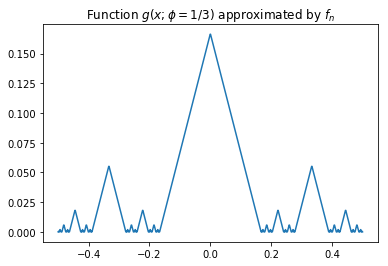

In [50]:
# 3a 
phi = 1/3.

def func(x,k=None):
    
    if k is None:
        k = np.ceil(-16* np.log10(phi))
    if k==0:
        return abs(x)
    return abs(f(x,phi,k-1) - phi**k)
x = np.linspace(-.5,.5,1000)
plt.plot(x,f(x,phi,n))
plt.title('Function $g(x;\phi=1/3)$ approximated by $f_n$')

In [63]:
phi_list = np.arange(1,100)/100.
# adapt_quad

n_int_list,err_list = [],[]
for phi in phi_list:
    n_int,err = adapt_quad(-.5,.5).values[0,-2:].tolist()
    n_int_list.append(n_int)
    err_list.append(err)


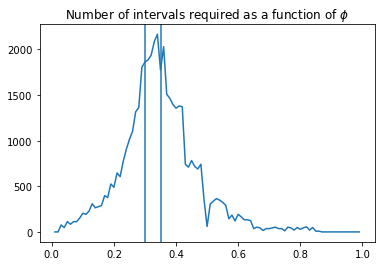

In [70]:
plt.plot(phi_list,n_int_list)
plt.axvline(0.35)
plt.axvline(0.3)
plt.title('Number of intervals required as a function of $\phi$')

### answer 3 b 
$\phi= 0.3 \sim 0.35 $ has the require the most intervals

## Question 6


In [8]:

# 6 a set up ODE system for solver
from sympy import *
x, y, u, v = symbols('x y u v')

J = (x-u**2) + y **2 + 2*(1-u)/sqrt(x**2+y**2) + 2*u/sqrt(  (x-1)**2 + y**2) - u**2-v**2

print J.diff(u)
print J.diff(v)
print J.diff(x)
print J.diff(y)

-4*u + 2/sqrt(y**2 + (x - 1)**2) - 2/sqrt(x**2 + y**2)
-2*v
2*u*(-x + 1)/(y**2 + (x - 1)**2)**(3/2) - x*(-2*u + 2)/(x**2 + y**2)**(3/2) + 1
-2*u*y/(y**2 + (x - 1)**2)**(3/2) - y*(-2*u + 2)/(x**2 + y**2)**(3/2) + 2*y


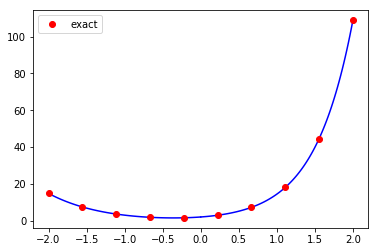

## 6 b

In [28]:
def determine_collision(point_a,point_b,radius):
    # v = (point_a + lam * segment ); v dot segment = 0 gives 3 cases for collision  
    segment = point_b - point_a
    
    lam = - point_a.dot(segment) / segment.dot(segment)
    v = (point_a + lam * segment )
    if 0 < lam < 1.:
        return np.linalg.norm(v) <= radius
    elif lam >= 1:
        return np.linalg.norm(point_b) <= radius
    else:
        return np.linalg.norm(point_a) <= radius

## 6c 

In [25]:
# calculate initial conditions based hte formula
def get_initial_conditions():
    obs_0 = np.array([1.0798,0.]) 
    obs_1 = np.array([1.0802,-0.0189])

    e = np.random.normal(scale=0.002,
                         size=4)
    
    point_0 = obs_0 + e[:2]
    point_1 = obs_1 + e[2:]
    
    # velocity is average displacement 
    v = (point_1 - point_0)/0.02
    return [point_0[0],v[0],point_0[1],v[1]]

init = get_initial_conditions()
print 'initial condition v(0)',init[1],init[3]

initial condition v(0) 0.0881653114415 -0.760196502177


In [26]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def F(params, t):
    mu = 0.01
    x, u, y, v = params
    dudt = v + x - mu - (1 - mu) * x / (x**2 + y**2)**(3/2) - mu*(x-1)/((x-1)**2 + y**2)**(3/2)
    dvdt = -u + y - ((1-mu)*y)/((x**2+y**2)**1.5) - mu*y/(((x-1)**2 + y**2)**1.5)
    return [u, dudt, v, dvdt]

def get_trajectory(n):
    # time points
    tt = np.linspace(0, 10, n)
    # Initial conditions on y, y' at x=0
    init_params = get_initial_conditions()
    sol = odeint(F, init_params, tt)
    # x and y coorindates
    return sol[:, 0], sol[:, 2]


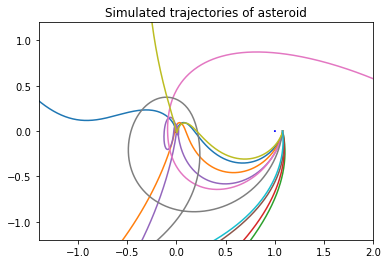

In [52]:
num_trials = 10


def plotter(positions=None,title='Simulated trajectories of asteroid'):
    plt.figure()
    ax = plt.gca()
    plt.title(title)
    if positions is None:
        for i in range(num_trials):
            positions = get_trajectory(1000)
            plt.plot(positions[0], positions[1])
    else:
        for position in positions:
            plt.plot(position[0], position[1])
    earth = plt.Circle((0, 0), 0.02, color='red')
    moon = plt.Circle((1, 0), 0.005, color='blue')
    ax.add_artist(earth)
    ax.add_artist(moon)
    ax.set_xlim([-1.4, 2])
    ax.set_ylim([-1.2, 1.2])
    
    plt.show()
    
plotter(positions=None)


## 6 d

In [35]:
total = 2500
collide_earth = []
collide_moon = []
no_collision = 0

for n in range(total):
    positions = get_trajectory(500)
    collide = False
    for i in range(len(positions[0]) - 1):
        
        # does it collid with earth ?
        if determine_collision(np.array([positions[0][i], positions[1][i]]), np.array([positions[0][i+1], positions[1][i+1]]), 0.02):
            collide_earth.append(positions)
            collide = True
            break
        # does it collid with moon ?
        if determine_collision(np.array([positions[0][i]-1, positions[1][i]]), np.array([positions[0][i+1]-1, positions[1][i+1]]), 0.005):
            collide_moon.append(positions)
            collide = True
            break
    if not collide:
        no_collision += 1

In [34]:
print 'collisions with moon',np.sum(collide_moon),'prob=',np.sum(collide_moon)/2500.
print 'collision with earth',np.sum(collide_earth),'prob=',np.sum(collide_earth)/2500.
print  'no collision',no_collision
print 'out of ',total,'trials'

collisions with moon 2 prob= 0.0008
collision with earth 347 prob= 0.1388
no collision 2151
out of  2500 trials


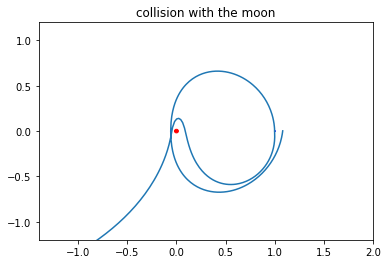

In [54]:
plotter(positions=collide_moon[0:2],title='collision with the moon')

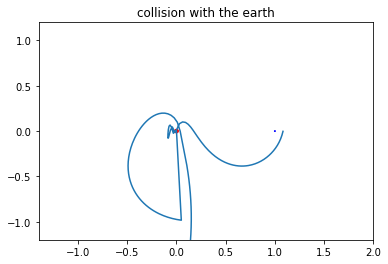

In [49]:
plotter(positions=collide_earth[0],title='collision with the earth')